In [111]:
import networkx as nx

In [162]:
# Grafo aleatorio con n vertices y probabilidad p
n = 10
p = 0.5
g = nx.erdos_renyi_graph(n,p,seed=0)

In [163]:
# Resumen del grafo
print(g)

Graph with 10 nodes and 19 edges


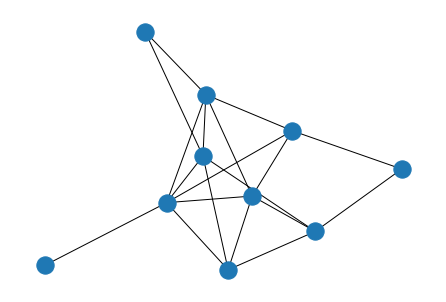

In [164]:
# Imprimir grafo
nx.draw(g)

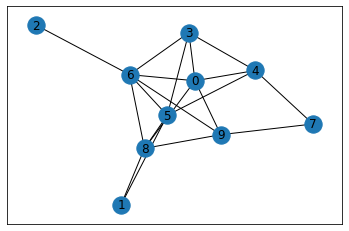

In [165]:
# Imprimir grafo con etiquetas de vertices
nx.draw_networkx(g)

In [166]:
# Número de vértices del grafo. Opción 1
len(g)

10

In [167]:
# Número de vértices del grafo. Opción 2
g.number_of_nodes()

10

In [168]:
# Número de aristas del grafo
g.number_of_edges()

19

In [169]:
# Determinar si dos vertices son adyacentes
u = 2
v = 6
g.has_edge(u,v)

True

In [170]:
# Determinar si dos vertices son adyacentes. Otro ejemplo
u = 2
v = 3
g.has_edge(u,v)

False

In [171]:
# Grado de un vértice
v = 2
g.degree(v)

1

In [172]:
# Iterar sobre los vértices:
for v in g:
    print(v)

0
1
2
3
4
5
6
7
8
9


In [173]:
# Iterar sobre los vecinos de un vértice:
v = 0
for u in g.neighbors(v):
    print(u)

3
4
6
8
9


In [174]:
# Iterar sobre las aristas:
for u,v in g.edges:
    print(u,v)

0 3
0 4
0 6
0 8
0 9
1 5
1 8
2 6
3 4
3 5
3 6
4 5
4 7
5 6
5 8
6 8
6 9
7 9
8 9
